In [12]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 12.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import mne
import pandas as pd
import matplotlib as plt

In [2]:
df1=pd.read_csv('RecA.txt',header=4,index_col=False, usecols=range(1,9))
df2=pd.read_csv('RecB.txt',header=4,index_col=False, usecols=range(1,9))


df1.columns=['FP1', 'FP2', 'C3', 'C4', 'P7','P8', 'O1', 'O2']
df2.columns=['FP1', 'FP2', 'C3', 'C4', 'P7','P8', 'O1', 'O2']


In [3]:
df1=df1.transpose()
df2=df2.transpose()
df1=df1*1e-6
df2=df2*1e-6

channels=['FP1', 'FP2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2']
sf=250

mneInfo = mne.create_info(ch_names=channels, sfreq=sf, ch_types="eeg")
raw1 = mne.io.RawArray(df1, mneInfo)
raw2 = mne.io.RawArray(df2, mneInfo)

montage=mne.channels.read_custom_montage("electrode_positions_8channel.sfp")
raw1.set_montage(montage)
raw2.set_montage(montage)

Creating RawArray with float64 data, n_channels=8, n_times=6217
    Range : 0 ... 6216 =      0.000 ...    24.864 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=6401
    Range : 0 ... 6400 =      0.000 ...    25.600 secs
Ready.


/var/folders/ty/gml1wn_51m7c5hbwp_n2k2f80000gn/T/ipykernel_27325/4008809189.py:14: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw1.set_montage(montage)
/var/folders/ty/gml1wn_51m7c5hbwp_n2k2f80000gn/T/ipykernel_27325/4008809189.py:15: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw2.set_montage(montage)


<RawArray | 8 x 6401 (25.6 s), ~417 kB, data loaded>

Using matplotlib as 2D backend.


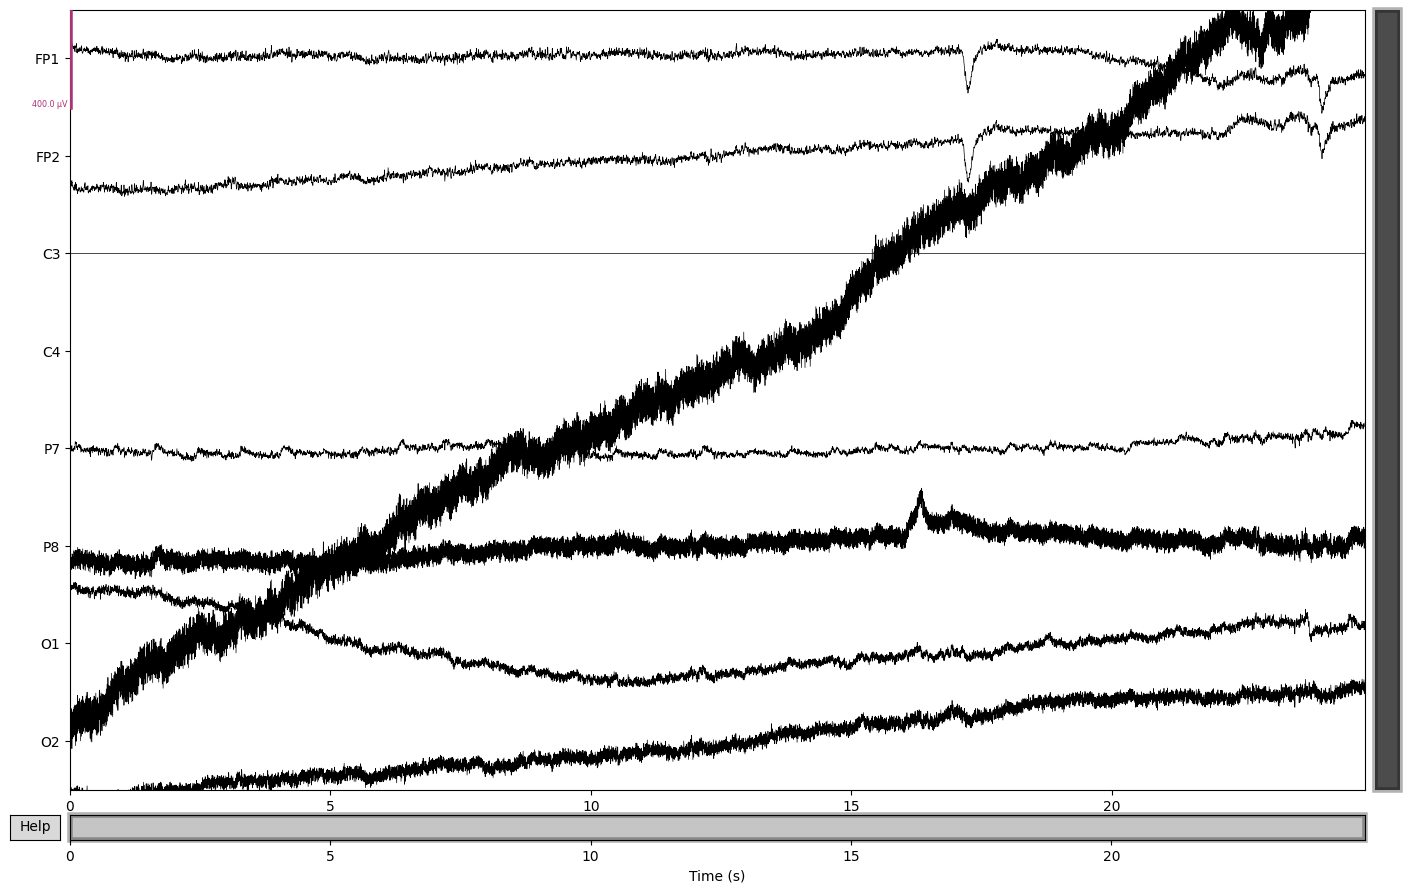

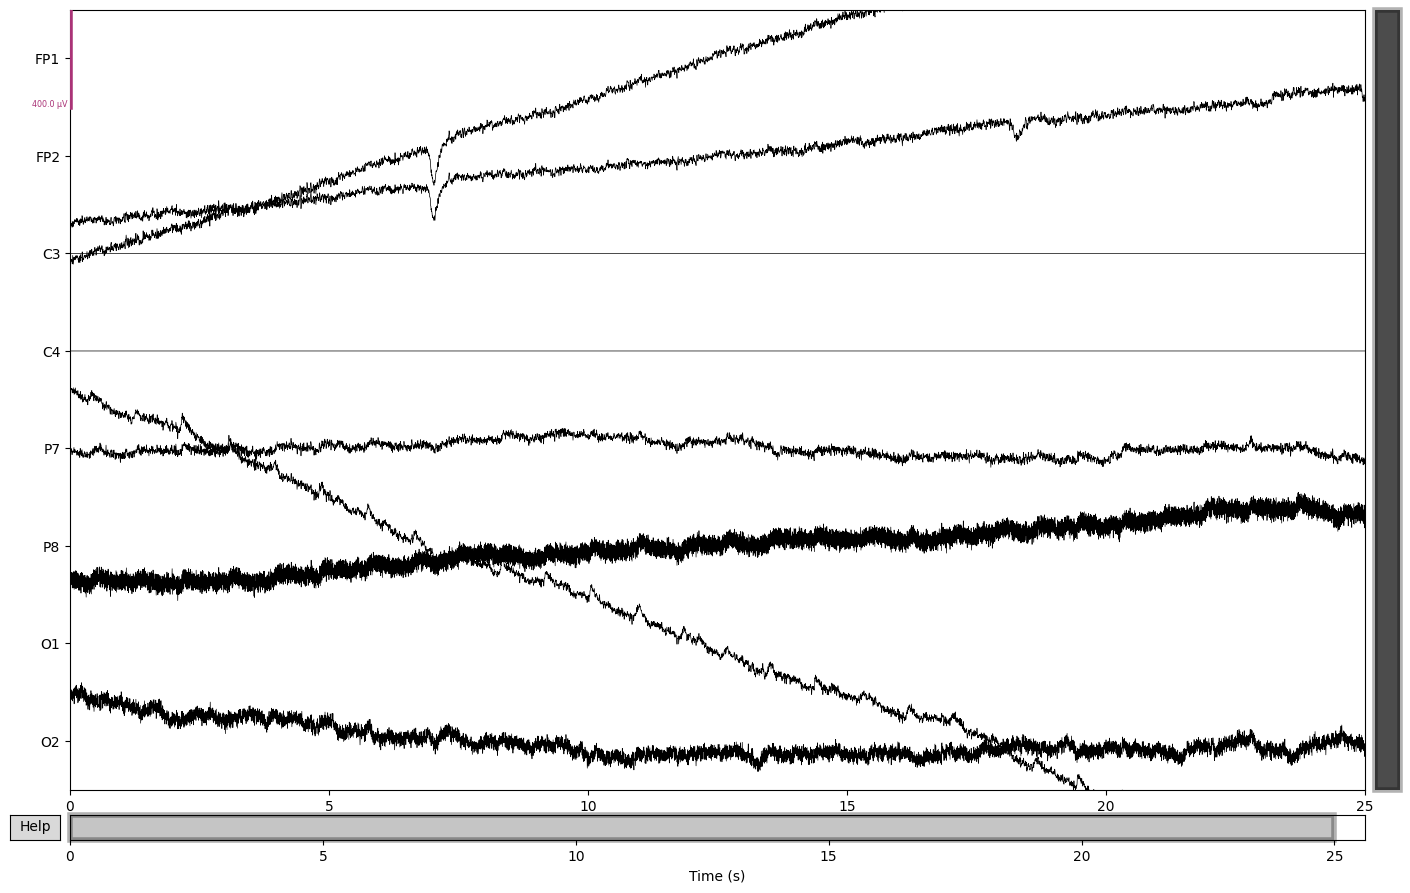

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 s)



/var/folders/ty/gml1wn_51m7c5hbwp_n2k2f80000gn/T/ipykernel_27325/2581079524.py:6: RuntimeWarning: filter_length (8251) is longer than the signal (6217), distortion is likely. Reduce filter length or filter a longer signal.
  raw1.filter(l_freq=band_start, h_freq=band_stop)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper pass

/var/folders/ty/gml1wn_51m7c5hbwp_n2k2f80000gn/T/ipykernel_27325/2581079524.py:7: RuntimeWarning: filter_length (8251) is longer than the signal (6401), distortion is likely. Reduce filter length or filter a longer signal.
  raw2.filter(l_freq=band_start, h_freq=band_stop)


<RawArray | 8 x 6401 (25.6 s), ~417 kB, data loaded>

In [4]:
raw1.plot(duration=25,scalings=dict(eeg=200e-6),clipping=None) 
raw2.plot(duration=25,scalings=dict(eeg=200e-6),clipping=None) 

band_start=0.1
band_stop=100
raw1.filter(l_freq=band_start, h_freq=band_stop)
raw2.filter(l_freq=band_start, h_freq=band_stop)

raw1.notch_filter(freqs=60)
raw2.notch_filter(freqs=60)


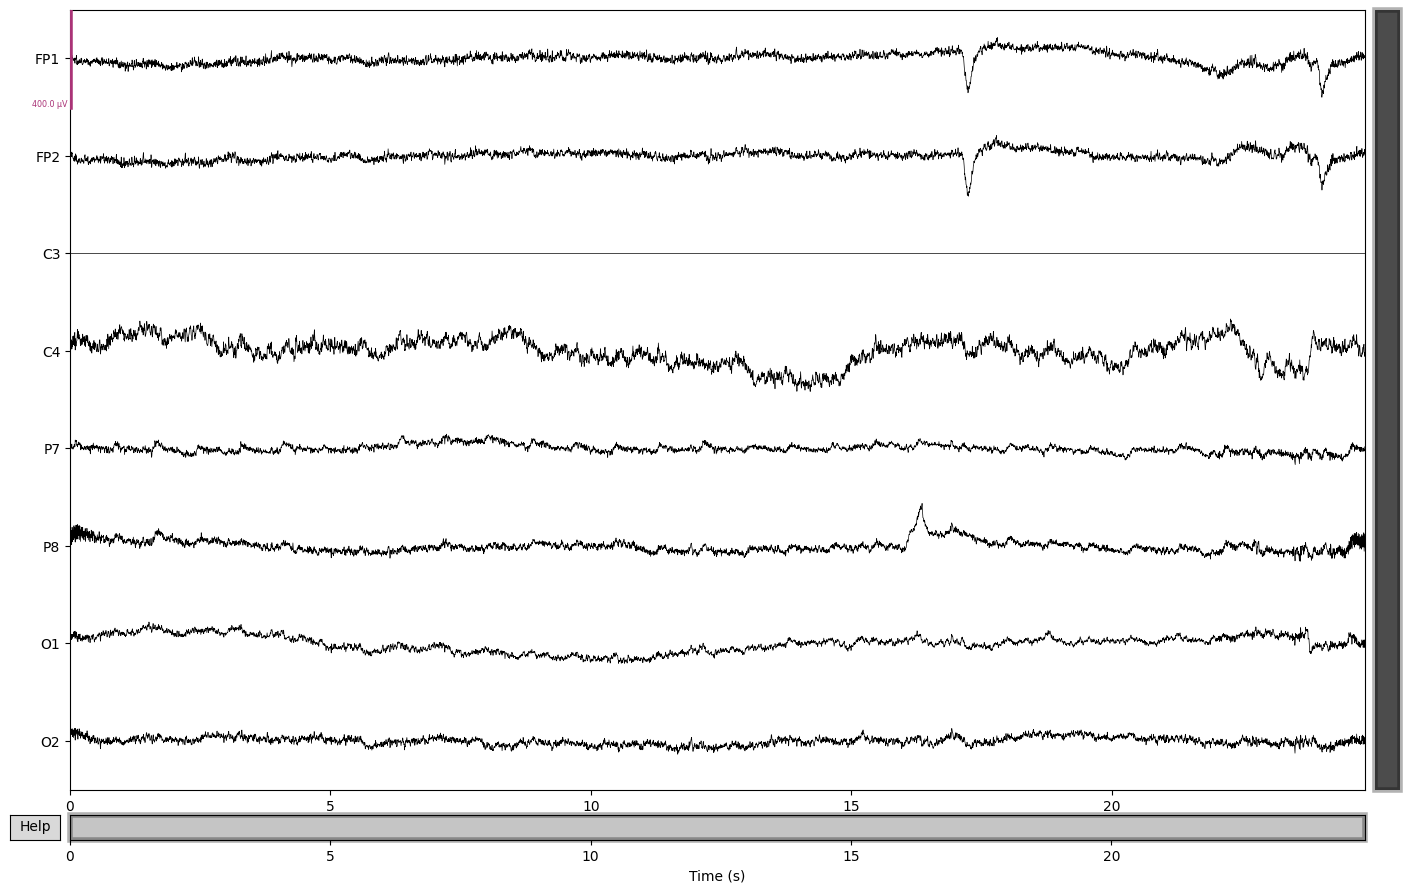

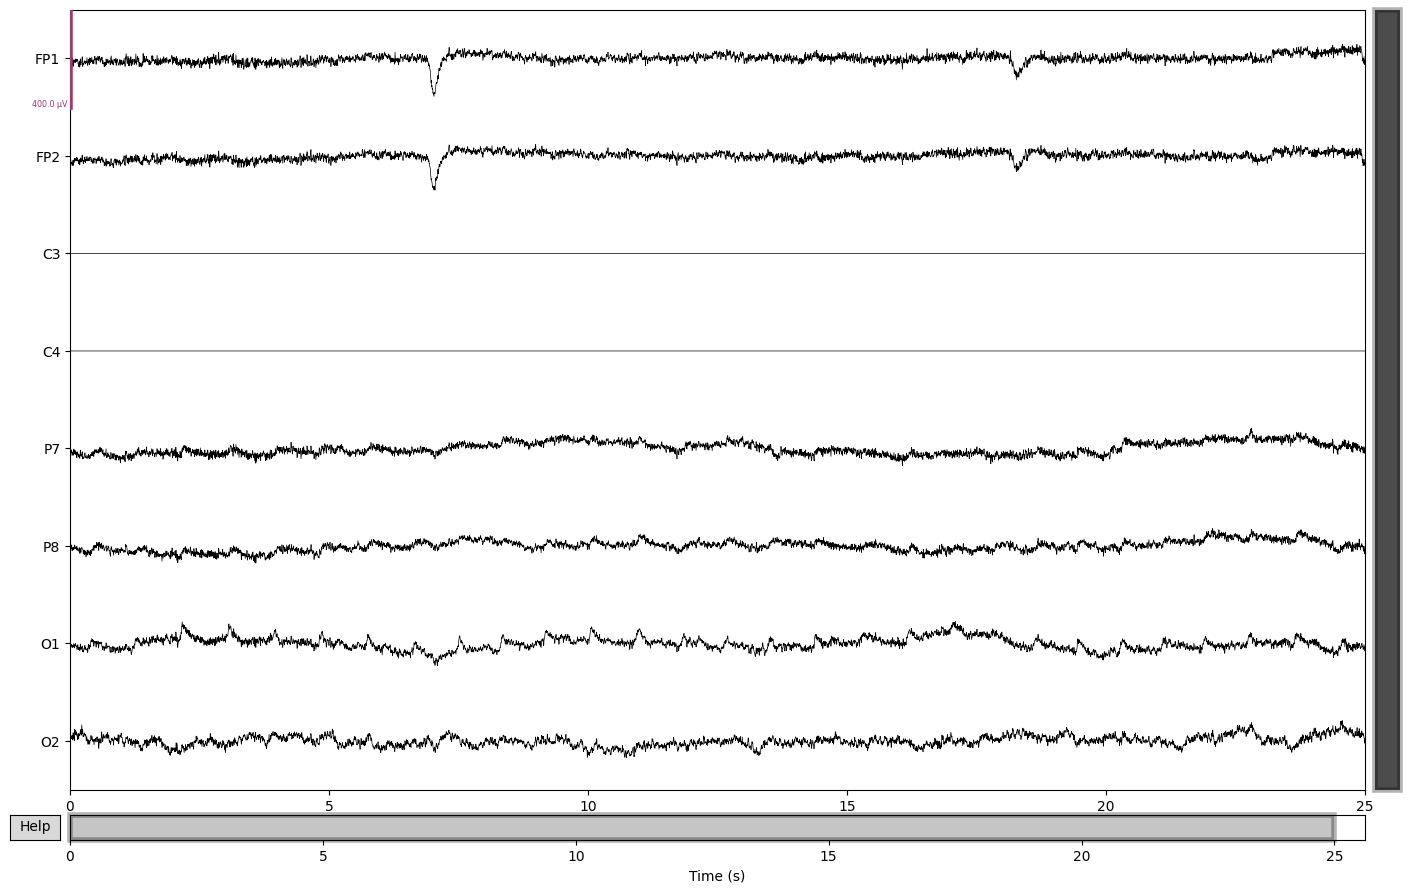

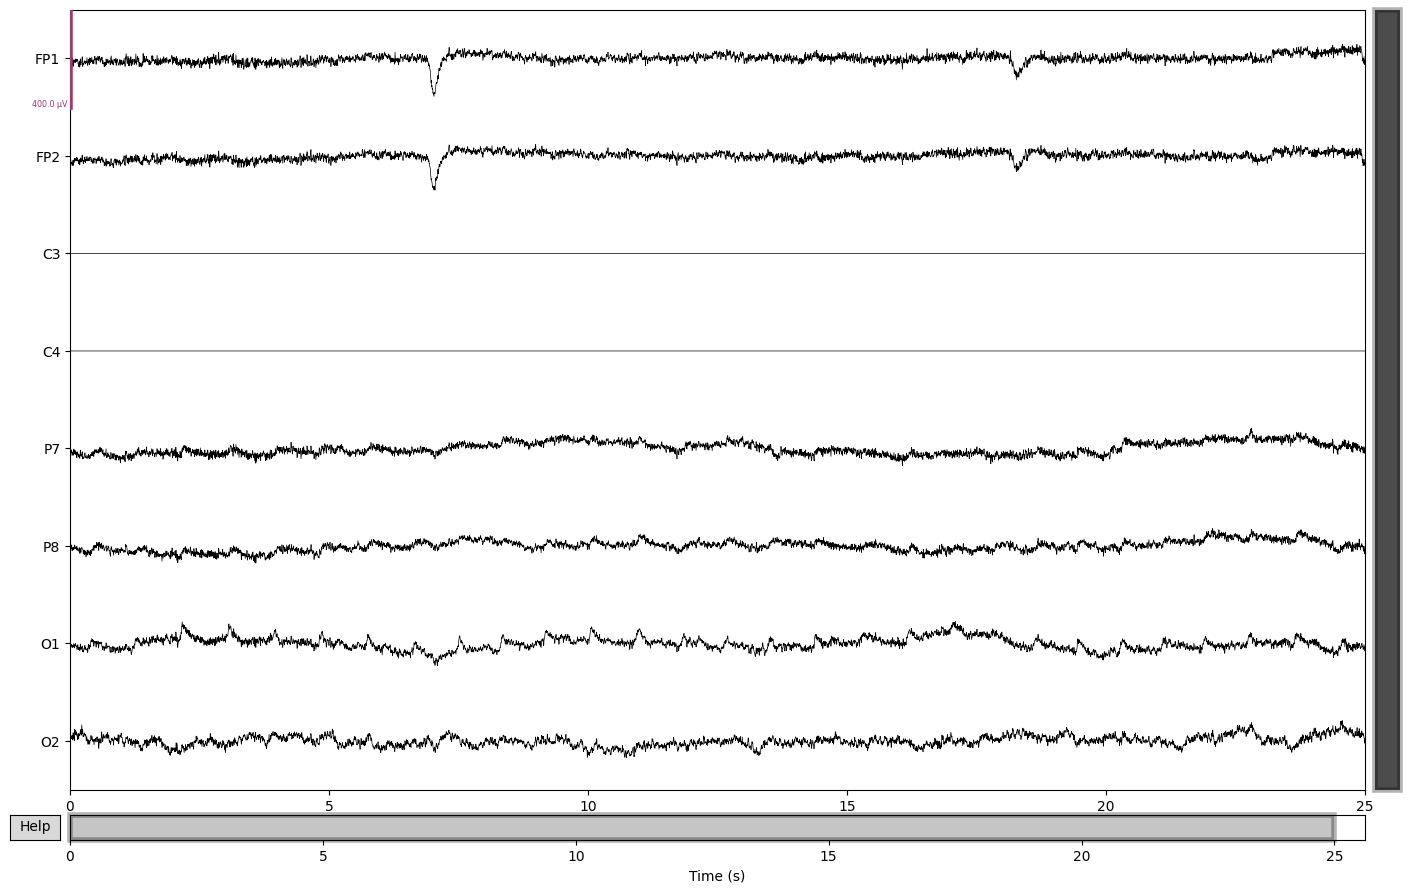

In [5]:
raw1.plot(duration=25,scalings=dict(eeg=200e-6),clipping=None) 
raw2.plot(duration=25,scalings=dict(eeg=200e-6),clipping=None) 


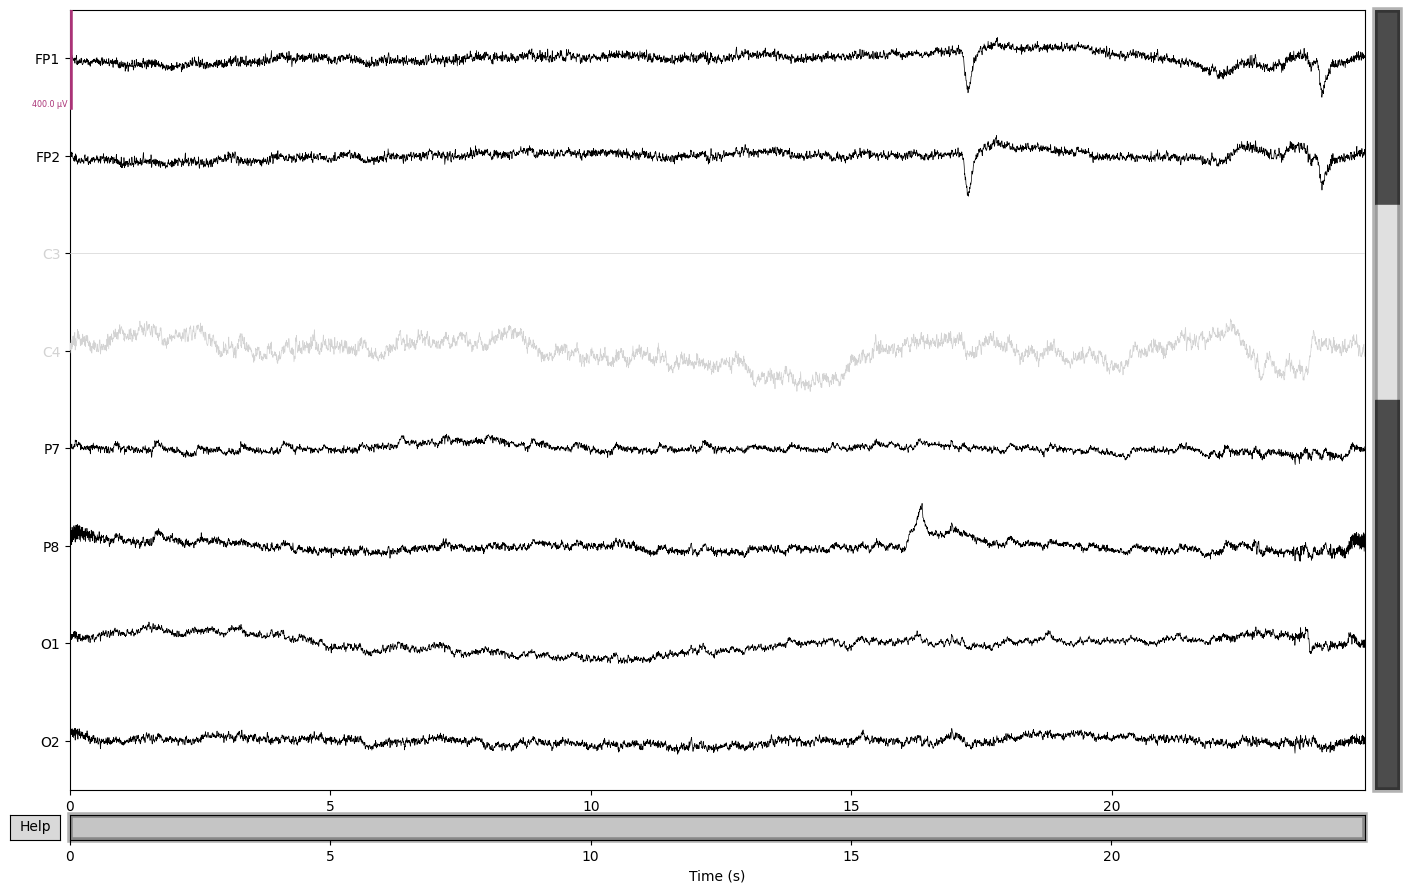

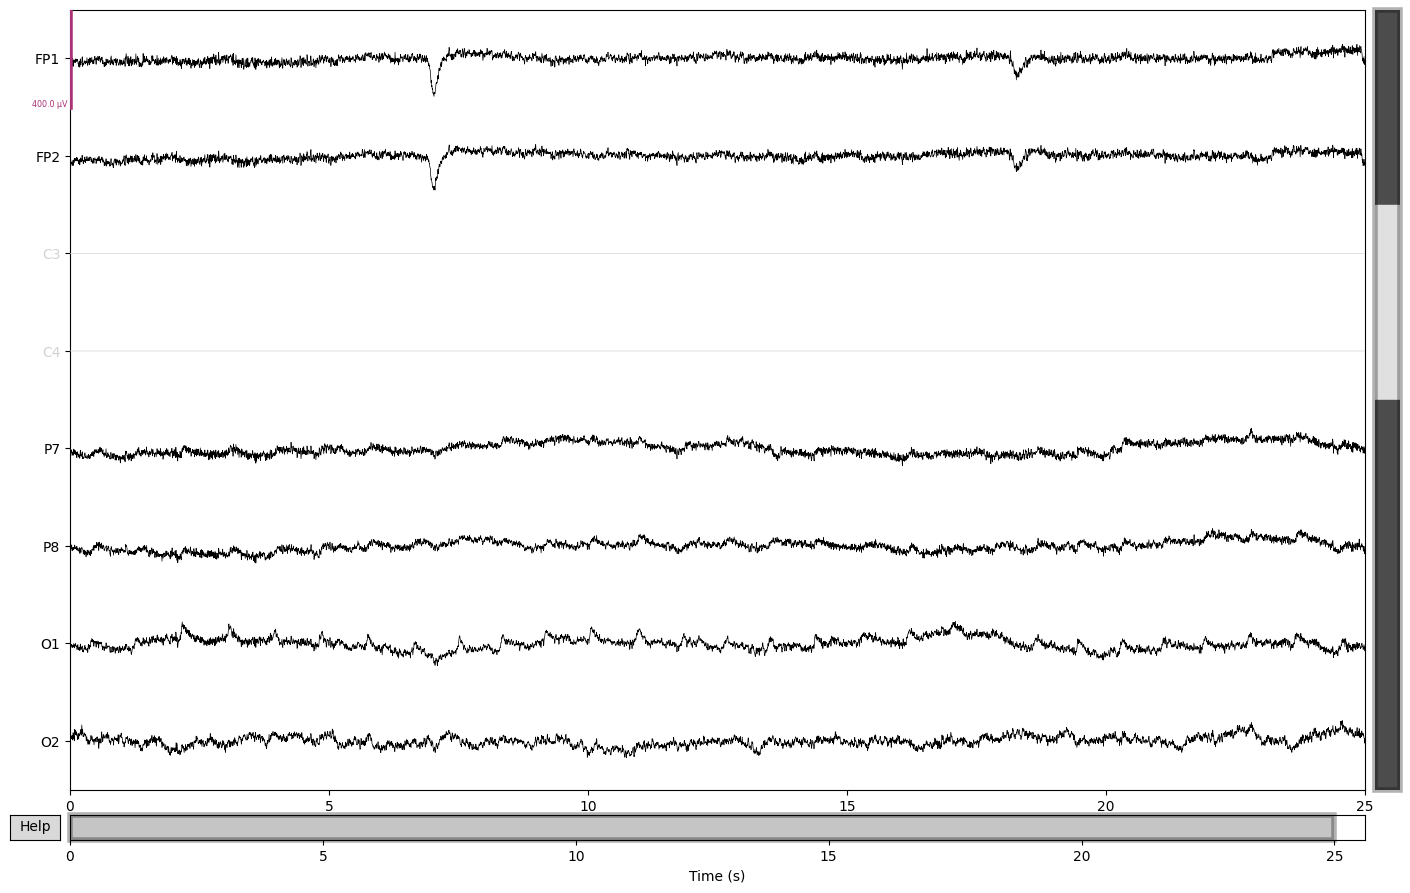

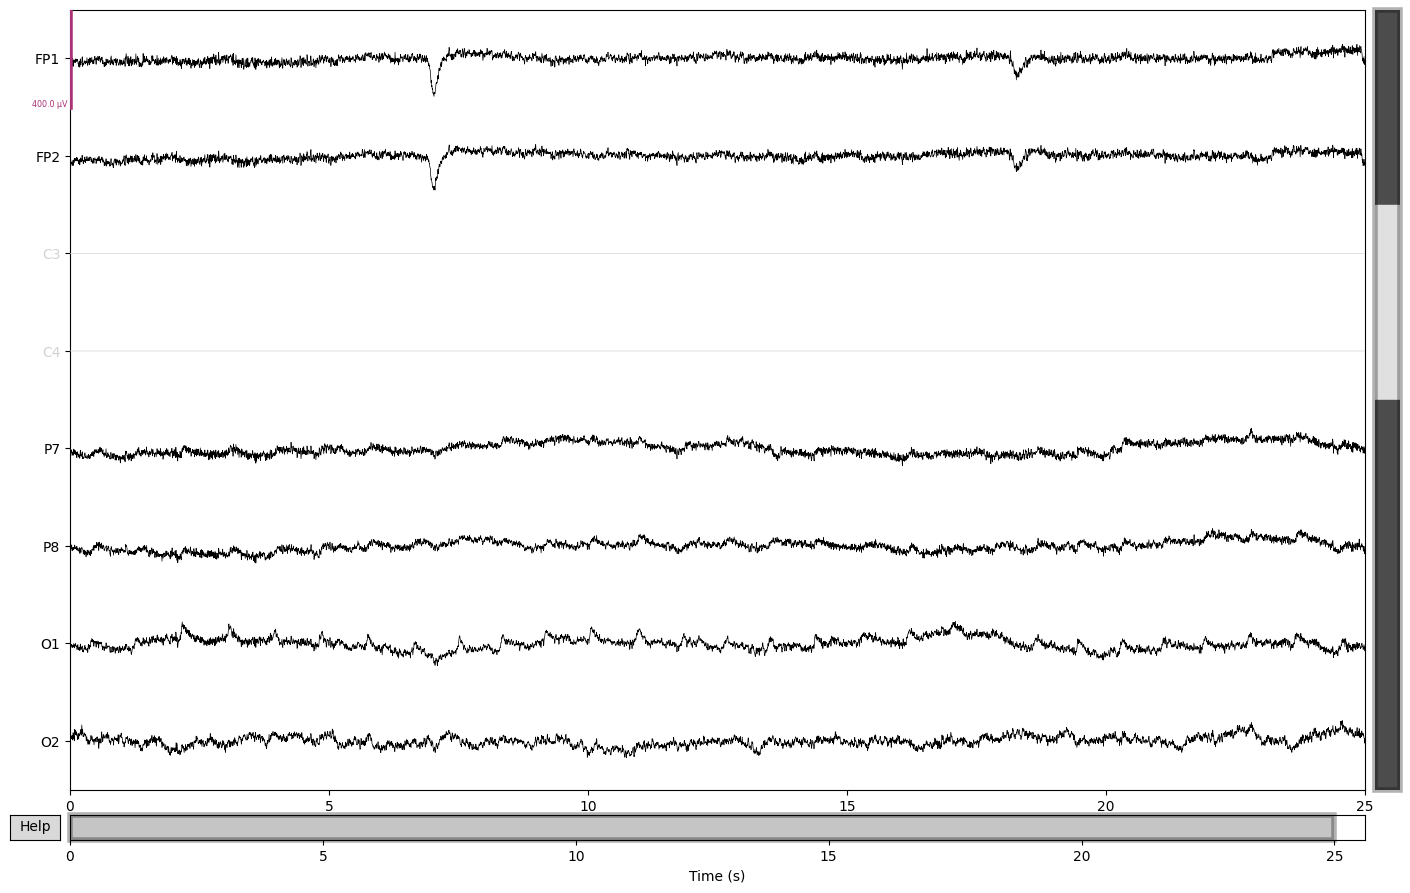

In [6]:
raw1.info['bads'].extend(['C3','C4'])
raw2.info['bads'].extend(['C3','C4'])

raw1.plot(duration=25,scalings=dict(eeg=200e-6),clipping=None) 
raw2.plot(duration=25,scalings=dict(eeg=200e-6),clipping=None) 

Effective window size : 8.192 (s)


/Users/jannisgabler/anaconda3/lib/python3.10/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


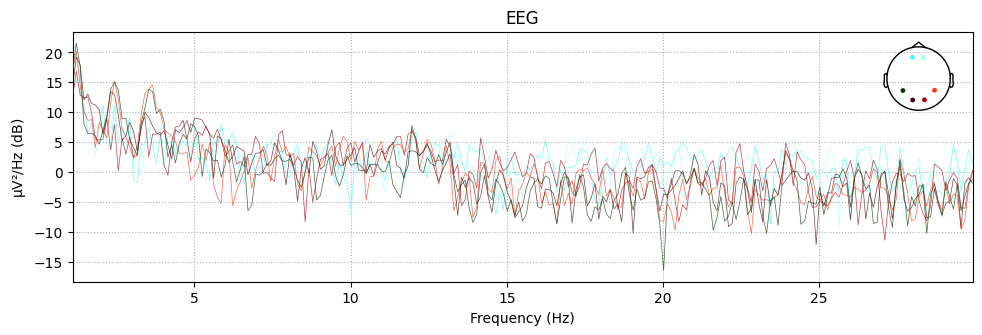

In [7]:
fmin=1
fmax=30
raw1.compute_psd(fmin=fmin, fmax=fmax).plot()


Effective window size : 8.192 (s)


/Users/jannisgabler/anaconda3/lib/python3.10/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


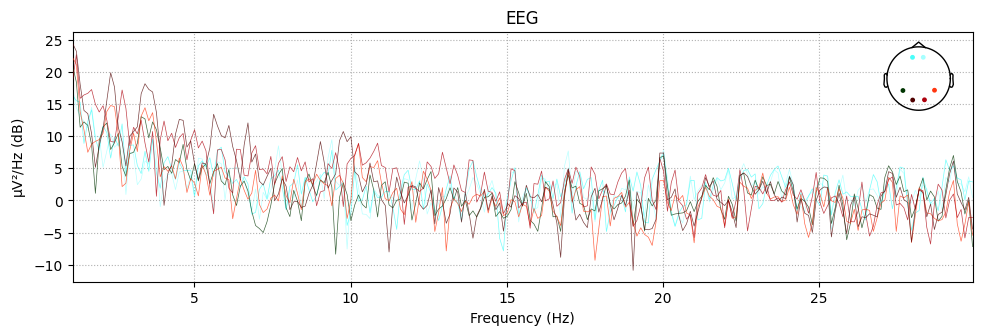

In [8]:
raw2.compute_psd(fmin=fmin, fmax=fmax).plot()

In [17]:
ica1=mne.preprocessing.ICA()
ica2=mne.preprocessing.ICA()
ica1.fit(raw1)
ica2.fit(raw2)

Fitting ICA to data using 6 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 6 components
Fitting ICA took 0.0s.
Fitting ICA to data using 6 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 6 components
Fitting ICA took 0.6s.


/Users/jannisgabler/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 6401 samples), 6 ICA components (6 PCA components available), channel types: eeg, no sources marked for exclusion>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated


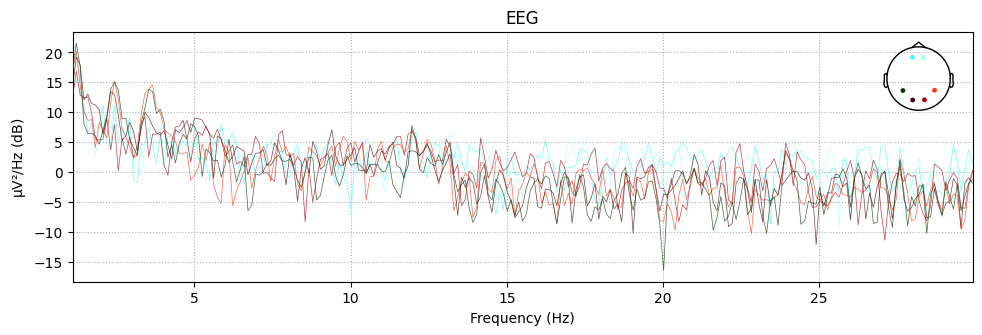

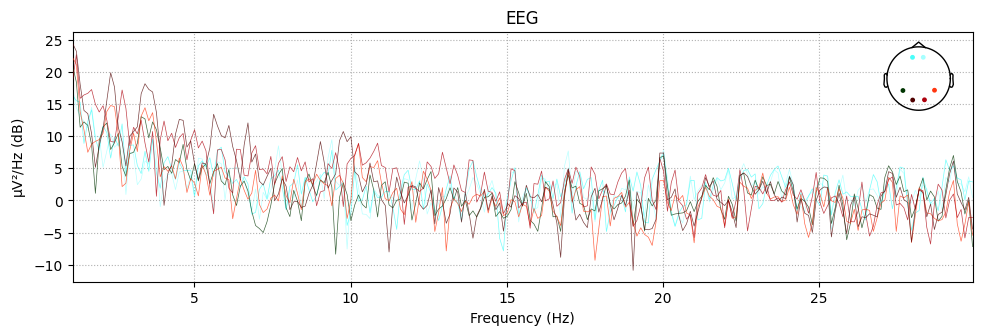

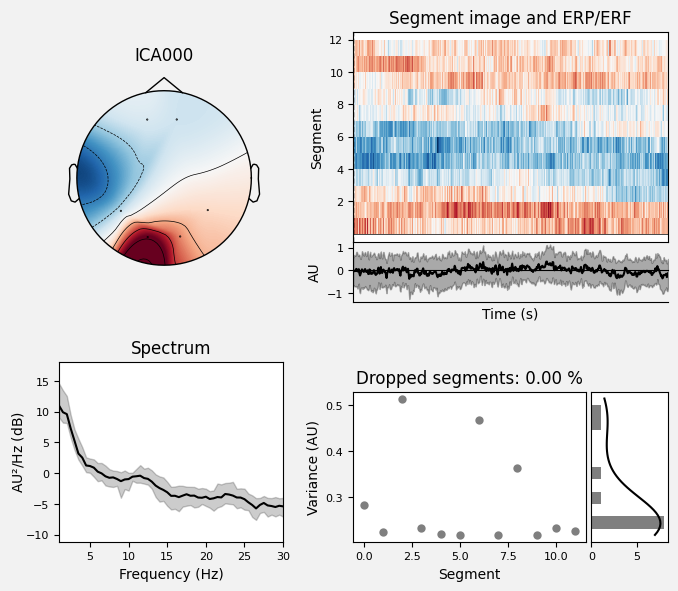

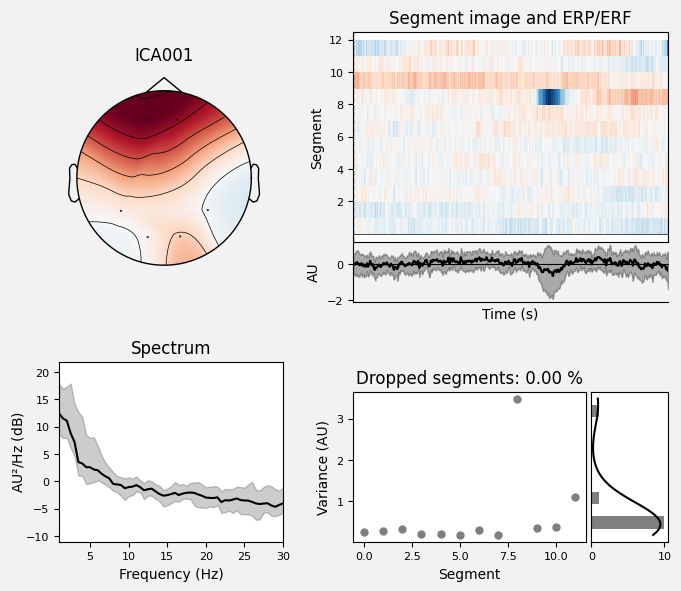

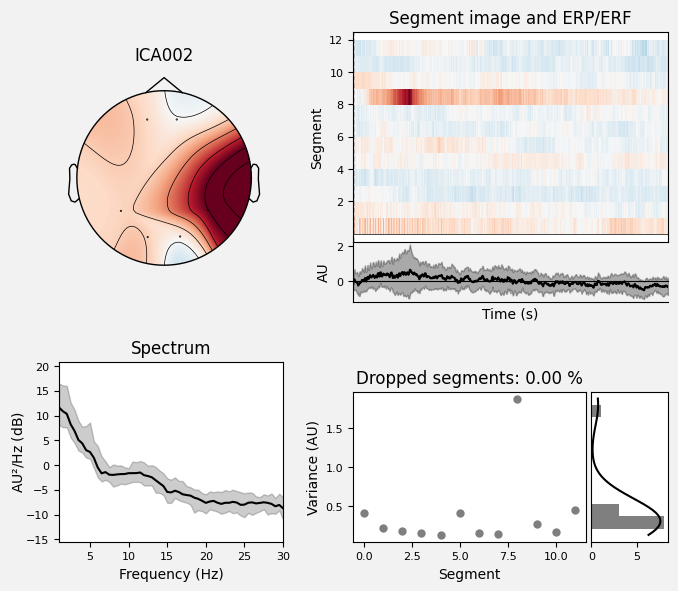

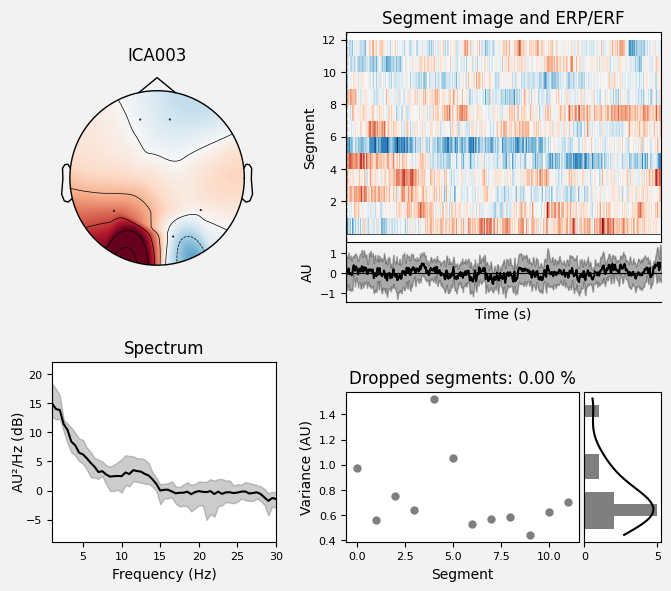

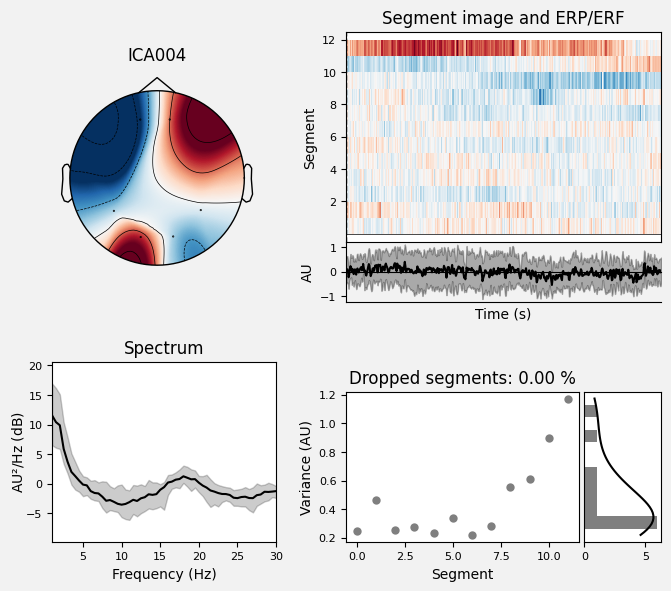

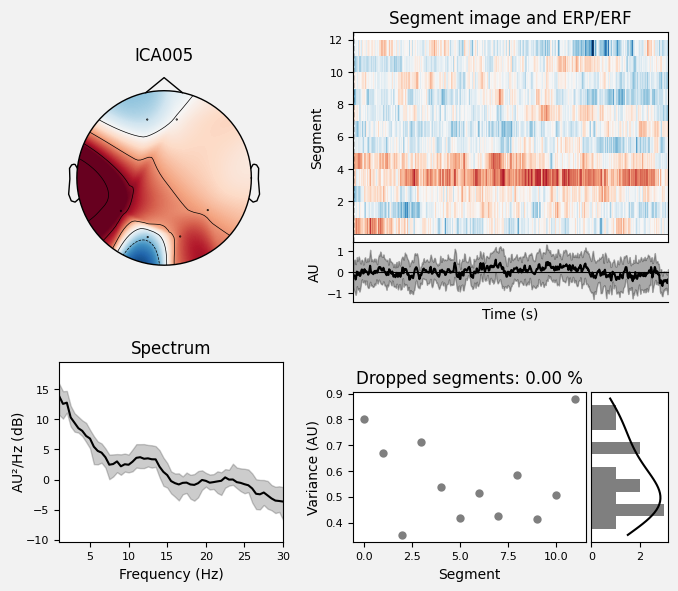

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated


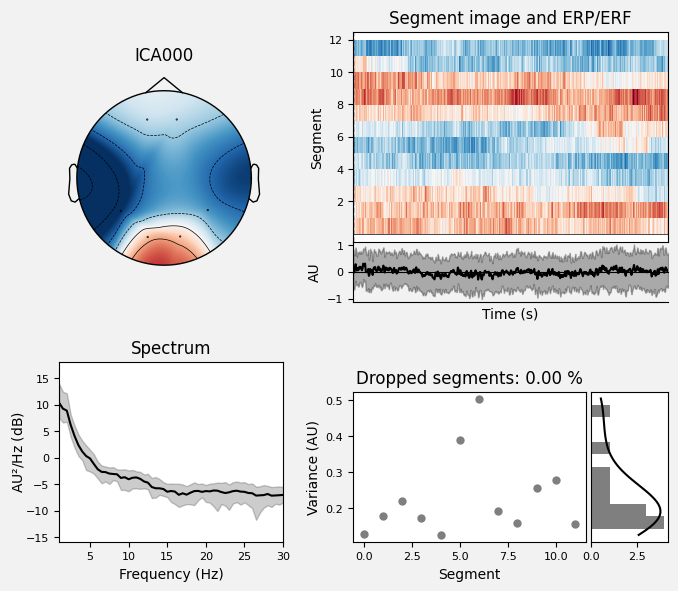

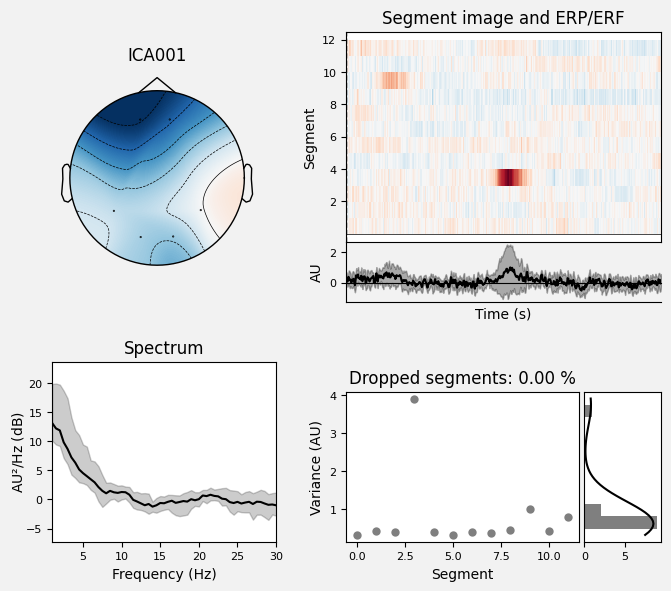

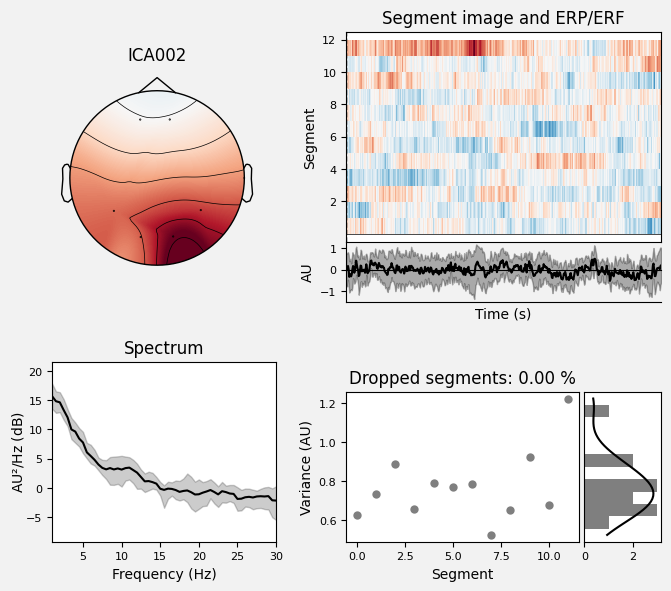

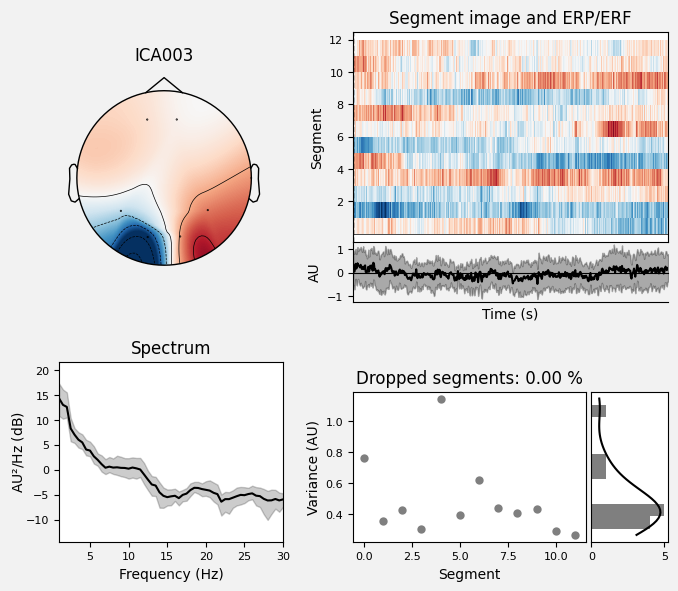

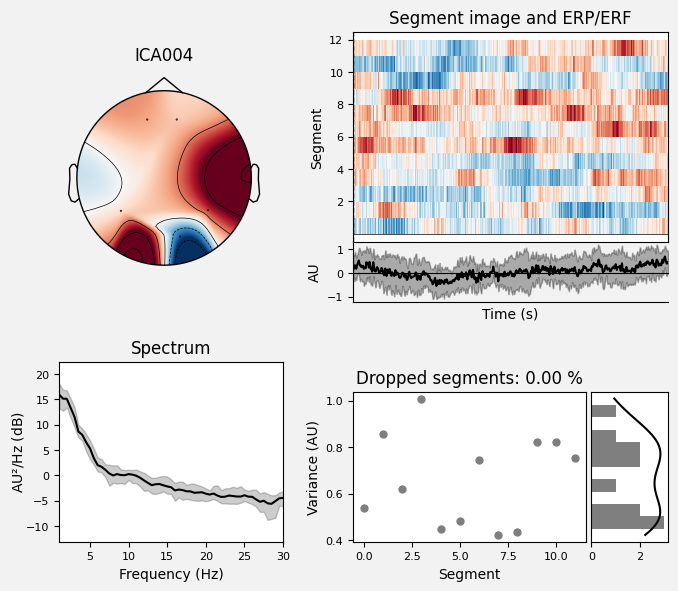

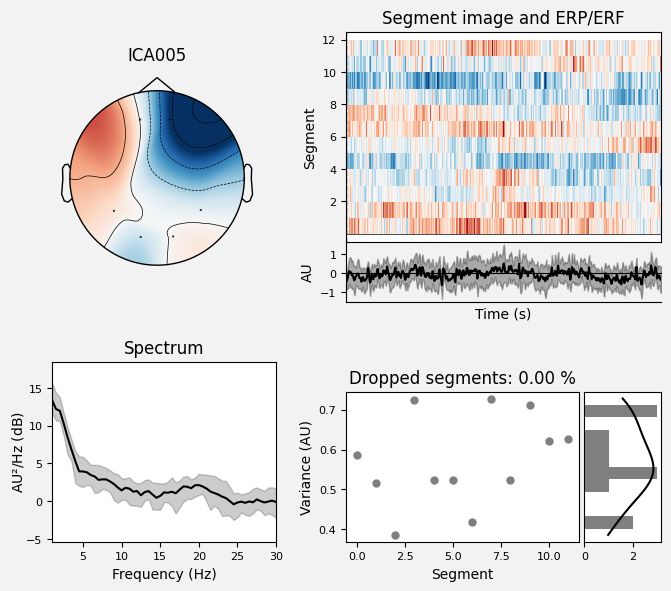

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [18]:
ica1.plot_properties(raw1,picks=range(6),psd_args=dict(fmin=1,fmax=30))
ica2.plot_properties(raw2,picks=range(6),psd_args=dict(fmin=1,fmax=30))